# STOCK DATA ANALYSIS FOR AAPL

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime

In [2]:
data = pd.read_csv('stockdata\\stock_AAPL.csv')
print(data.describe())
print(data.info())

             open        high         low       close        volume  \
count  403.000000  403.000000  403.000000  403.000000  4.030000e+02   
mean   138.379504  139.315261  137.496452  138.493945  2.936934e+07   
std     24.205132   24.293410   23.970691   24.121304  1.286572e+07   
min     92.900000   93.660000   92.140000   93.590000  1.147592e+07   
25%    114.330000  115.715000  113.500000  114.550000  2.143903e+07   
50%    143.500000  144.160000  142.510000  143.640000  2.615330e+07   
75%    157.145000  158.130000  156.115000  157.065000  3.337260e+07   
max    179.370000  180.100000  178.250000  179.260000  1.123403e+08   

             macd         mfi         rsi   william_r  stochastic_fast  \
count  370.000000  383.000000  383.000000  383.000000       383.000000   
mean     1.408784   57.529060   60.610966   -0.342219         0.657807   
std      1.554942   14.327854   13.415921    0.281421         0.281452   
min     -1.800000   10.220000   28.960000   -1.000000         0.

In [3]:
#William %R - The oscillator is on a negative scale, from −100 (lowest) up to 0 (highest),
#obverse of the more common 0 to 100 scale found in many Technical Analysis oscillators.
#A value of −100 means the close today was the lowest low of the past N days,
#and 0 means today's close was the highest high of the past N days.
#Williams used a 10 trading day period and considered values below -80 as oversold and above -20 as overbought.

In [4]:
data.head()

,date_txn,symbol,open,high,low,close,volume,macd,mfi,rsi,william_r,stochastic_fast,stochastic_slow,bollinger_bands,chaikin_money_flow,obv,log_timestamp,datasource
0,2016-06-28,AAPL,92.90,93.66,92.14,93.59,40444914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-28 06:09:09.664752,NaN
1,2016-06-29,AAPL,93.97,94.55,93.63,94.40,36531006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-28 06:09:09.664752,NaN
2,2016-06-30,AAPL,94.44,95.77,94.30,95.60,35836356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-28 06:09:09.664752,NaN
3,2016-07-01,AAPL,95.49,96.46,95.33,95.89,26026540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-28 06:09:09.664752,NaN
4,2016-07-05,AAPL,95.39,95.40,94.46,94.99,27705210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-28 06:09:09.664752,NaN


## Looking at the basic trend of the stock

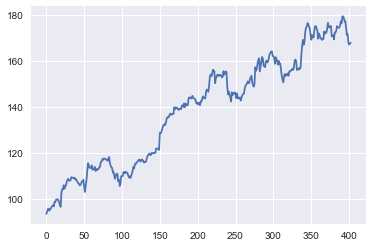

In [5]:
plt.plot(data['close'] )

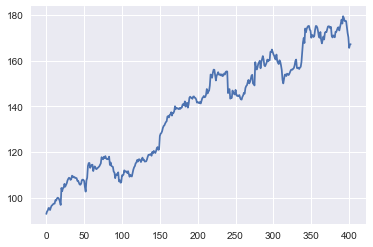

In [6]:
plt.plot(data['open'])

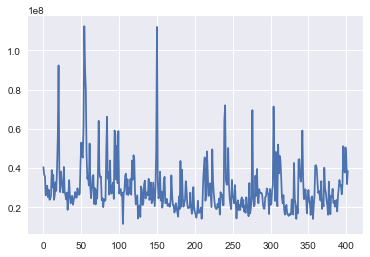

In [7]:
plt.plot(data['volume'])

In [8]:
data.index = data['date_txn']

In [9]:
data.head()

,date_txn,symbol,open,high,low,close,volume,macd,mfi,rsi,william_r,stochastic_fast,stochastic_slow,bollinger_bands,chaikin_money_flow,obv,log_timestamp,datasource
date_txn,,,,,,,,,,,,,,,,,,
2016-06-28,2016-06-28,AAPL,92.90,93.66,92.14,93.59,40444914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-28 06:09:09.664752,NaN
2016-06-29,2016-06-29,AAPL,93.97,94.55,93.63,94.40,36531006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-28 06:09:09.664752,NaN
2016-06-30,2016-06-30,AAPL,94.44,95.77,94.30,95.60,35836356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-28 06:09:09.664752,NaN
2016-07-01,2016-07-01,AAPL,95.49,96.46,95.33,95.89,26026540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-28 06:09:09.664752,NaN
2016-07-05,2016-07-05,AAPL,95.39,95.40,94.46,94.99,27705210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-28 06:09:09.664752,NaN


In [10]:
data.drop('date_txn', axis = 1, inplace=True)

Linecharts are fine, but there are at least four variables involved for each date (open, high, low, and close), and we would like to have some visual way to see all four variables that does not require plotting four separate lines. Financial data is often plotted with a Japanese candlestick plot, so named because it was first created by 18th century Japanese rice traders.

In [11]:
from matplotlib.dates import DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY
from matplotlib.finance import candlestick_ohlc, date2num
 
def pandas_candlestick_ohlc(dat, stick = "day", otherseries = None):
    """
    :param dat: pandas DataFrame object with datetime64 index, and float columns "Open", "High", "Low", and "Close", likely created via DataReader from "yahoo"
    :param stick: A string or number indicating the period of time covered by a single candlestick. Valid string inputs include "day", "week", "month", and "year", ("day" default), and any numeric input indicates the number of trading days included in a period
    :param otherseries: An iterable that will be coerced into a list, containing the columns of dat that hold other series to be plotted as lines
 
    This will show a Japanese candlestick plot for stock data stored in dat, also plotting other series if passed.
    """
    mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
    alldays = DayLocator()              # minor ticks on the days
    dayFormatter = DateFormatter('%d')      # e.g., 12
 
    # Create a new DataFrame which includes OHLC data for each period specified by stick input
    transdat = dat.loc[:,["open", "high", "low", "close"]]
    if (type(stick) == str):
        if stick == "day":
            plotdat = transdat
            stick = 1 # Used for plotting
        elif stick in ["week", "month", "year"]:
            if stick == "week":
                transdat["week"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[1]) # Identify weeks
            elif stick == "month":
                transdat["month"] = pd.to_datetime(transdat.index).map(lambda x: x.month) # Identify months
            transdat["year"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[0]) # Identify years
            grouped = transdat.groupby(list(set(["year",stick]))) # Group by year and other appropriate variable
            plotdat = pd.DataFrame({"open": [], "high": [], "low": [], "close": []}) # Create empty data frame containing what will be plotted
            for name, group in grouped:
                plotdat = plotdat.append(pd.DataFrame({"open": group.iloc[0,0],
                                            "high": max(group.high),
                                            "how": min(group.low),
                                            "close": group.iloc[-1,3]},
                                           index = [group.index[0]]))
            if stick == "week": stick = 5
            elif stick == "month": stick = 30
            elif stick == "year": stick = 365
 
    elif (type(stick) == int and stick >= 1):
        transdat["stick"] = [np.floor(i / stick) for i in range(len(transdat.index))]
        grouped = transdat.groupby("stick")
        plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
        for name, group in grouped:
            plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                        "High": max(group.high),
                                        "Low": min(group.low),
                                        "Close": group.iloc[-1,3]},
                                       index = [group.index[0]]))
 
    else:
        raise ValueError('Valid inputs to argument "stick" include the strings "day", "week", "month", "year", or a positive integer')
 
 
    # Set plot parameters, including the axis object ax used for plotting
    fig, ax = plt.subplots(figsize=(18, 12))
    fig.subplots_adjust(bottom=0.2)
    if pd.to_datetime(plotdat.index[-1]) - pd.to_datetime(plotdat.index[0]) < pd.Timedelta('730 days'):
        weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
        ax.xaxis.set_major_locator(mondays)
        ax.xaxis.set_minor_locator(alldays)
    else:
        weekFormatter = DateFormatter('%b %d, %Y')
    ax.xaxis.set_major_formatter(weekFormatter)
 
    ax.grid(True)
 
    # Create the candelstick chart
    time_format = '%Y-%m-%d'
    time = [datetime.strptime(i, time_format) for i in plotdat.index.tolist()]
    candlestick_ohlc(ax, list(zip(list(date2num(time)), plotdat["open"].tolist(), plotdat["high"].tolist(),
                      plotdat["low"].tolist(), plotdat["close"].tolist())))
 
    # Plot other series (such as moving averages) as lines
    if otherseries != None:
        if type(otherseries) != list:
            otherseries = [otherseries]
        dat.loc[:,otherseries].plot(ax = ax, lw = 1.3, grid = True)
 
    ax.xaxis_date()
    ax.autoscale_view()
    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


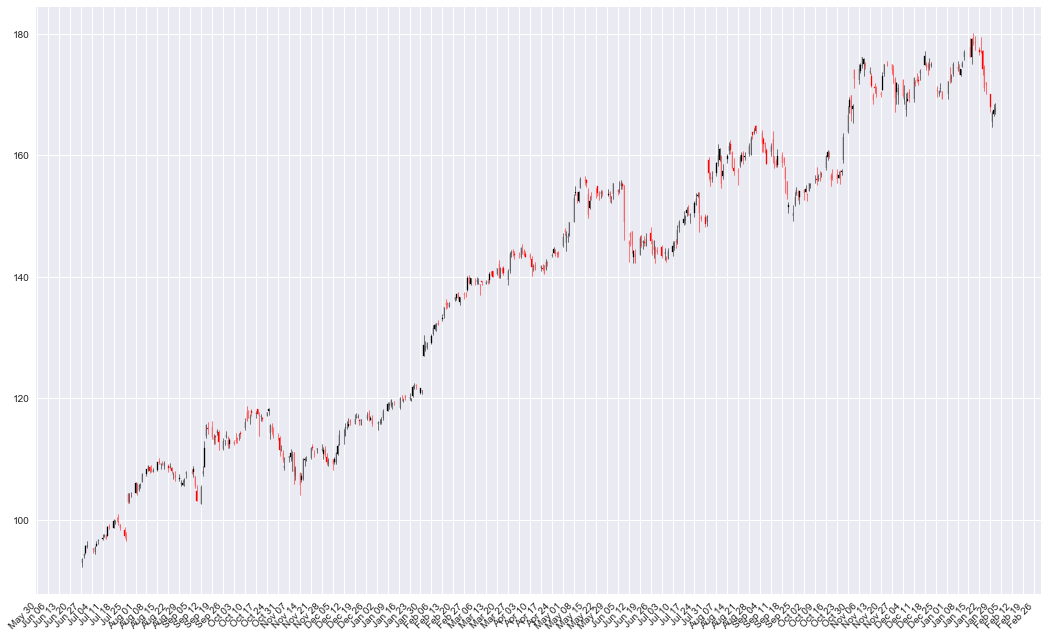

In [12]:
pandas_candlestick_ohlc(data)

We see that we have been able to successfully obtain our Candlestick plot which makes it easy to read and interpret the stock behaviour.
But, the figure obtained above is not very smooth to study because of it's gigantic size and large number of data points(every Monday on a macroscopic level). 
Now, we try to use plot the same details of the stock in an interactive graph using plotly and cufflinks.

In [13]:
from plotly import __version__
from plotly.offline import init_notebook_mode, iplot, download_plotlyjs, plot
import plotly.plotly as py

In [14]:
import plotly.graph_objs as go

In [15]:
init_notebook_mode(connected=True)

In [16]:
import cufflinks as cf
cf.go_offline()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [17]:
trace = go.Candlestick(x = data.index,
                      open = data.open,
                      high = data.high,
                      low = data.low,
                      close = data.close)

In [18]:
datayy = [trace]

In [19]:
iplot(datayy)
#Using this, one can zoom in to the required snippet of time.

We try to plot the moving averages column alongwith ohlc for better Technical Analysis:

In [20]:
new = pd.DataFrame(datayy[0])
new.head()

,close,high,low,open,type,x
date_txn,,,,,,
2016-06-28,93.59,93.66,92.14,92.90,candlestick,2016-06-28
2016-06-29,94.40,94.55,93.63,93.97,candlestick,2016-06-29
2016-06-30,95.60,95.77,94.30,94.44,candlestick,2016-06-30
2016-07-01,95.89,96.46,95.33,95.49,candlestick,2016-07-01
2016-07-05,94.99,95.40,94.46,95.39,candlestick,2016-07-05


In [21]:
new.drop(['type', 'x'], axis=1, inplace=True)
new = pd.concat([new, data['macd']], axis=1)
new.head()

,close,high,low,open,macd
date_txn,,,,,
2016-06-28,93.59,93.66,92.14,92.90,NaN
2016-06-29,94.40,94.55,93.63,93.97,NaN
2016-06-30,95.60,95.77,94.30,94.44,NaN
2016-07-01,95.89,96.46,95.33,95.49,NaN
2016-07-05,94.99,95.40,94.46,95.39,NaN


In [22]:
new.iplot()

***MFI*** - is used to measure the ***enthusiasm*** of the market.
In other words, the money flow index shows how much a stock was traded.
A value of **80 or more is generally considered overbought**, a value of **20 or less oversold**.
The values of MFI can be studied very easily through the below interactive graph:

In [23]:
data['mfi'].iplot()

***RSI - Relative Strength Index (RSI)*** is a momentum oscillator that measures the speed and change of price movements.
RSI oscillates between zero and 100.
RSI is considered **overbought when above 70** and **oversold when below 30**.

In [24]:
data['rsi'].iplot()

***William %R*** - The oscillator is on a negative scale, from −100 (lowest) up to 0 (highest),
obverse of the more common 0 to 100 scale found in many Technical Analysis oscillators.
A value of **−100 means the close today was the lowest low of the past N days**,
and **0 means today's close was the highest high of the past N days**.
Williams used a 10 trading day period and considered **values below -80 as oversold** and **above -20 as overbought**.

In [25]:
data['william_r'].iplot()

### Stochastic oscillators are an important tool for Technical Analysis. One can easily study them from the graph below:

In [26]:
data[['stochastic_fast', 'stochastic_slow']].iplot()

***Chaikin Money Flow*** is an oscillator that measures buying and selling pressure over a set period of time.
At its most basic, money flow favors the bulls when CMF is positive and the bears when negative.
Chartists looking for quicker money flow shifts can look for bullish and bearish divergences.

In [27]:
data['chaikin_money_flow'].iplot()

# Done!